Here create the Neural Network model (CNN layers followed by LSTM layers) to predict different arrhytmia on Electrocardiogram.

we used the MIT-BIH Arrhythmia Database, which obtained from 47 subjects studied by the BIH Arrhythmia Laboratory between 1975 and 1979.
Kaggle Dataset: https://www.kaggle.com/datasets/shayanfazeli/heartbeat/data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import train set of the MIT-BIH Arrhythmia Dataset 
CSV_1 = './Data/mitbih_train.csv'
CSV_2 = './Data/mitbih_test.csv'

mit_train = pd.read_csv(CSV_1, header=None)

print('The shape of train dataset :', mit_train.shape)
mit_train.head()

The shape of train dataset : (87554, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# import test set of the MIT-BIH Arrhythmia Dataset 
mit_test = pd.read_csv(CSV_2, header=None)

print('The shape of test dataset :', mit_test.shape)
mit_test.head()

The shape of test dataset : (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The last column is the label column with

In [5]:
# Check the labels in both train and test set
print('train set classes: ', mit_train.iloc[:, -1].unique())
print('train set classes: ', mit_test.iloc[:, -1].unique())

train set classes:  [0. 1. 2. 3. 4.]
train set classes:  [0. 1. 2. 3. 4.]


In [6]:
# Change the dtype of label column to integer
mit_train[187] = mit_train[187].astype('int64')

mit_test[187] = mit_test[187].astype('int64')

In [7]:
mit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(187), int64(1)
memory usage: 125.6 MB


In [8]:
mit_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [9]:
mit_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

the distribution of classes on both train and test datasets are same. So we can continue our work with both datasets.

# Balance dataset

Distribution of the data between different categories is not balanced. Therefore our model will train with unbalanced data and find bias and will be overfit. 

Balancing the dataset is crucial. Then it can effectively generalize to unseen data and provide fair and accurate predictions across all classes.

In [13]:
!pip install imbalanced-learn

In [14]:
from imblearn.over_sampling import RandomOverSampler

data = mit_train.iloc[:, :187]
labels = mit_train.iloc[:, 187]

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the data
data_resampled, labels_resampled = ros.fit_resample(data, labels)

train_df = pd.concat([data_resampled, labels_resampled], axis=1)

train_df.shape

(362355, 188)

In [16]:
pip install plotly

   ---------------------------------------- 0.0/19.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.0 MB ? eta -:--:--
    --------------------------------------- 0.3/19.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.0 MB 1.4 MB/s eta 0:00:14
   -- ------------------------------------- 1.0/19.0 MB 2.0 MB/s eta 0:00:09
   ---- ----------------------------------- 2.1/19.0 MB 3.0 MB/s eta 0:00:06
   ------ --------------------------------- 3.1/19.0 MB 3.7 MB/s eta 0:00:05
   -------- ------------------------------- 3.9/19.0 MB 3.7 MB/s eta 0:00:05
   ----------- ---------------------------- 5.2/19.0 MB 4.0 MB/s eta 0:00:04
   ------------- -------------------------- 6.3/19.0 MB 4.1 MB/s eta 0:00:04
   --------------- ------------------------ 7.3/19.0 MB 4.4 MB/s eta 0:00:03
   ------------------ --------------------- 8.9/19.0 MB 4.7 MB/s eta 0:00:03
   --------------------- --

In [17]:
import plotly.express as px

In [19]:
labels = {
    0: "Normal",
    1: "Artial Premature",
    2: "Premature ventricular contraction",
    3: "Fusion of ventricular and normal",
    4: "Fusion of paced and normal"
}

# Calculate value counts and rename index using the labels dictionary
value_counts = train_df.iloc[:,-1].value_counts().rename(labels)

# Create the bar plot to see the count of labels
bar_fig = px.bar(x=value_counts.index, y=value_counts.values,
                labels = {'x':'Labels', 'y':'Counts'},
                 text_auto=True,
                 title="The Count of Each Label After Balancing"
                )

pie_fig = px.pie(names=value_counts.index, values=value_counts.values,
                 title="The Percentage of Each Label After Balancing")

bar_fig.update_layout(title_x=0.5, width=800, height=600)
pie_fig.update_layout(title_x=0.5, width=800, height=600)
bar_fig.show()
pie_fig.show()

We should prepare the data by splitting it into training, validation, and test sets. Split the train dataset into training and validation sets with test size of 20%.

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_df.iloc[:, :187],
                                                train_df.iloc[:, 187],
                                                test_size= 0.2,
                                                stratify=train_df.iloc[:, 187],
                                                random_state=42)

x_test = mit_test.iloc[:, :187]
y_test = mit_test.iloc[:, 187]

In [21]:
# Select an array of data instead of dataframe
x_train = x_train.values
x_val = x_val.values
x_test = x_test.values

In [22]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187)
y_train shape:  (289884,)
x_val shape:  (72471, 187)
y_val shape:  (72471,)
x_test shape:  (21892, 187)
y_test shape:  (21892,)


# Create The Model

# Add Dimension

Before creating the model architecture, since we are using CNN, we need to add another dimension to our dataset.

In [23]:
# Reshape datasets to use them in CNN 
x_train = x_train.reshape(x_train.shape[0], -1, 1)
x_val = x_val.reshape(x_val.shape[0], -1, 1)
x_test = x_test.reshape(x_test.shape[0], -1, 1)

In [24]:
import tensorflow as tf

# Converts a class vector (integers) to binary class matrix (one hot encoder).

y_train = tf.keras.utils.to_categorical(y_train)

y_val = tf.keras.utils.to_categorical(y_val)

y_test = tf.keras.utils.to_categorical(y_test)

In [25]:
# See some samples of data
print(y_train[-1])
print(y_val[-1])
print(y_test[-1])

[0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1.]


In [26]:
# Check the dataset dimensions again 
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_val shape: ', x_val.shape)
print('y_val shape: ', y_val.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (289884, 187, 1)
y_train shape:  (289884, 5)
x_val shape:  (72471, 187, 1)
y_val shape:  (72471, 5)
x_test shape:  (21892, 187, 1)
y_test shape:  (21892, 5)


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, MaxPool1D, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

The model consists of three CNN layers, each with 64 filters and a kernel size of 6 for the first layer, and 3 for the second and third layers. ReLU activation functions are applied after each convolutional layer. Additionally, batch normalization layers are included after each Conv1D layer to normalize the activations. MaxPooling layers follow each Conv1D layer to reduce the spatial dimensions of the feature maps.

Following the CNN layers, two LSTM layers are added. The first LSTM layer contains 64 units and returns sequences. It utilizes the hyperbolic tangent (tanh) activation function. The second LSTM layer comprises 32 units and also uses the tanh activation function. LSTM layers are commonly employed for processing sequential data such as time series or text.

After the LSTM layers, a Flatten layer is introduced. This layer transforms the output of the LSTM layers into a 1D tensor, which is suitable for input to the Dense layers.

Finally, three Dense (fully connected) layers are appended to the model. The first Dense layer contains 64 units, and the second Dense layer contains 32 units, with ReLU activation applied to both layers. The output Dense layer consists of 5 units with softmax activation, making it suitable for a multi-class classification problem with 5 classes.

In [28]:
model_cnn_lstm = Sequential([
    Input(shape=(x_train.shape[1:])),
    
    Conv1D(64, kernel_size=6, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=3, strides=2, padding="same"),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2, strides=2, padding="same"),
    
    Conv1D(64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2, strides=2, padding="same"),

    LSTM(64, return_sequences=True, activation="tanh"),
    
    LSTM(32, activation="tanh"),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
    ])

In [29]:
model_cnn_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 182, 64)             │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 182, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 91, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 89, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 89, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 45, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 43, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 43, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 22, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 22, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,717 (295.77 KB)

 Trainable params: 75,333 (294.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [30]:
model_cnn_lstm.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

We use callbacks to enhance the training process of the neural network model.

# EarlyStopping
EarlyStopping prevents overfitting by stopping the training process early if the model's performance on the validation set stops improving. It helps to prevent unnecessary computational resources from being spent on training a model that is not improving.

# ReduceLROnPlateau
ReduceLROnPlateau reduces the learning rate when a metric has stopped improving, allowing the model to proceed with smaller steps towards the minimum of the loss function. This helps to fine-tune the model's performance and avoid overshooting the optimal solution.

In [33]:
callbacks = [EarlyStopping(monitor='val_loss', 
                           patience=8),
             ReduceLROnPlateau(patience=20,
                               monitor='val_loss',
                               min_lr=1e-6,
                               cool_down=20),
             ModelCheckpoint(filepath='best_model_cnn_lstm.keras', 
                             monitor='val_loss',
                             save_best_only=True)]

In [34]:
history = model_cnn_lstm.fit(x_train, y_train, 
                        epochs=10, 
                        callbacks=callbacks, 
                        batch_size=32, 
                        validation_data=(x_val, y_val),
                       verbose=1)

Epoch 1/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 210s 23ms/step - accuracy: 0.9734 - loss: 0.0792 - val_accuracy: 0.9831 - val_loss: 0.0529 - learning_rate: 0.0010
Epoch 2/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 232s 26ms/step - accuracy: 0.9841 - loss: 0.0485 - val_accuracy: 0.9870 - val_loss: 0.0406 - learning_rate: 0.0010
Epoch 3/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 229s 25ms/step - accuracy: 0.9883 - loss: 0.0364 - val_accuracy: 0.9631 - val_loss: 0.1191 - learning_rate: 0.0010
Epoch 4/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 235s 26ms/step - accuracy: 0.9904 - loss: 0.0297 - val_accuracy: 0.9909 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 5/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 239s 26ms/step - accuracy: 0.9925 - loss: 0.0241 - val_accuracy: 0.9930 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 6/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 232s 26ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9905 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 7/10
9059/9059 ━━━━━━━━━━━━━━━━━━━━ 233s 26ms/step -

see the change of train loss and validation loss and also change of train accuracy and validation accuracy pro epochs in line plots.

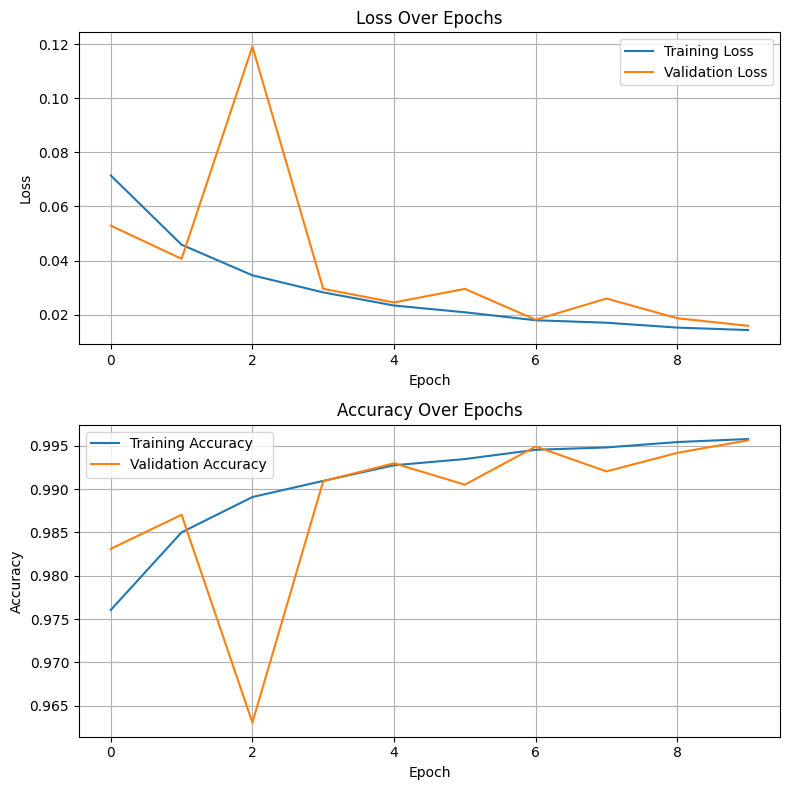

In [37]:
# Plot loss and accuracy of the model
fig, axs = plt.subplots(2, figsize=(8, 8))

# Plot loss
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot accuracy
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [38]:
# Comprison between the accuracy of model on train and validation datasets
train_score = model_cnn_lstm.evaluate(x_train, y_train)
validation_score = model_cnn_lstm.evaluate(x_val, y_val)

print('Accuracy Train data: ', train_score[1])
print('Accuracy Validation data: ', validation_score[1])

9059/9059 ━━━━━━━━━━━━━━━━━━━━ 63s 7ms/step - accuracy: 0.9968 - loss: 0.0115
2265/2265 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9956 - loss: 0.0161
Accuracy Train data:  0.9967883825302124
Accuracy Validation data:  0.9956258535385132


# Predict on Test Dataset

In [39]:
# Predict on the test data
y_pred = model_cnn_lstm.predict(x_test)

685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


Evaluate the performance of the model by comparing its predictions (y_pred) against the ground truth labels (y_test) using classification metrics.

Before that we have to convert one-hot encoded labels to integer labels.

In [40]:
from sklearn.metrics import classification_report

# Convert one-hot encoded labels to integer labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.77      0.85      0.81       556
           2       0.96      0.96      0.96      1448
           3       0.70      0.86      0.77       162
           4       0.98      0.99      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.88      0.93      0.90     21892
weighted avg       0.98      0.98      0.98     21892



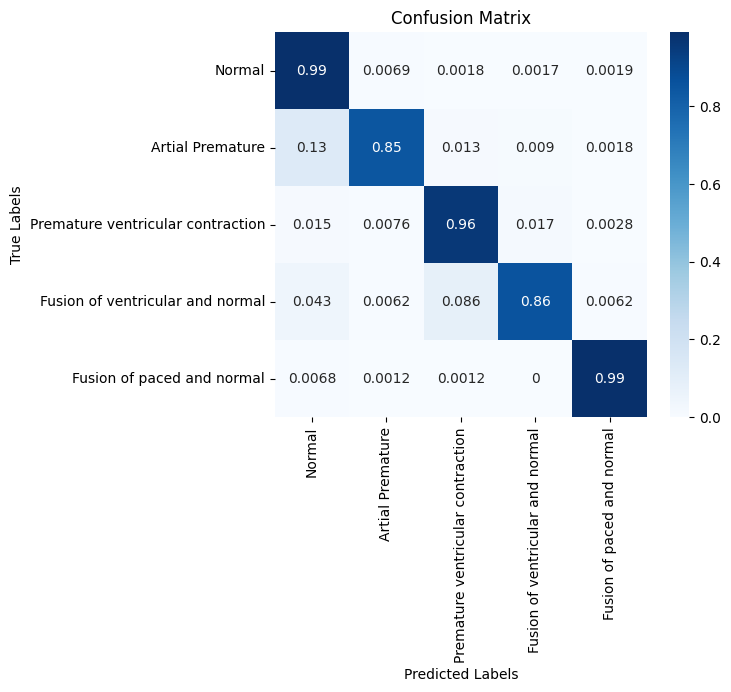

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, 
                      normalize='true'
                     )

labels = ['Normal', 'Artial Premature', 'Premature ventricular contraction', 'Fusion of ventricular and normal', 'Fusion of paced and normal']



plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
from tensorflow.keras.models import save_model

# Save the model
model_cnn_lstm.save('best_model1.keras')